In [3]:
%load_ext autoreload
%autoreload 2

In [13]:
from gaussian_beam.beam.beam import GaussianBeam
from gaussian_beam.components.lens import Lens
from gaussian_beam.components.sequence import Sequence
from gaussian_beam.utils.units import *
from gaussian_beam.optimize.collimator import Collimator
from gaussian_beam.optimize.focuser import Focuser

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
initial_beam = GaussianBeam(-10 * mm, [1.9378668 * mm, 1.82572056 * mm], 0, 4.48 * W, 10.6 * um)
lens_1 = Lens(0 * mm, 25.4 * mm)
lens_2 = Lens(10 * mm, 50 * mm)
lens_3 = Lens(100 * mm, 500 * mm)
sequence = Sequence([lens_1, lens_2, lens_3], (-20 * mm, 1500 * mm), initial_beam=initial_beam)

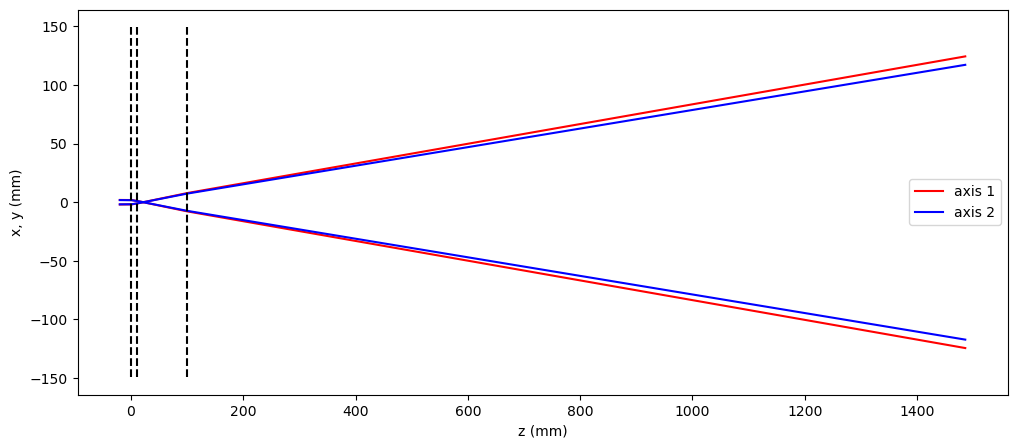

In [34]:
fig, ax = sequence.plot_xz()

In [35]:
collimator= Collimator(sequence=sequence, free_component_index=1, collimation_beam_index=2)
sequence_1 = collimator.run()

focuser = Focuser(sequence=sequence_1, 
                  free_component_index=2, 
                  focus_beam_index=3, 
                  focus_position=800*mm, 
                  optimization_axis=0)
sequence_2 = focuser.run()

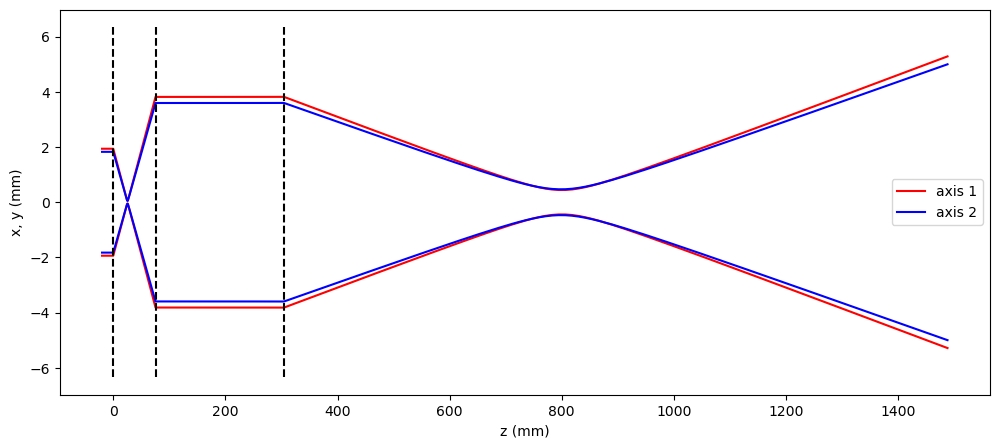

In [36]:
fig, ax = sequence_2.plot_xz()

In [13]:
sequence_2.beams[2].waist / um

array([3815.05017055, 3594.31719833])